In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("uber-trips-data.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head(10)

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512


This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup. You can get more datasets for the task of Uber trips analysis

In [4]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


So I have prepared this data according to the days and hours, as I am using the Uber trips for the September month so let’s have a look at each day to see on which day the Uber trips were highest:

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14984\1438482754.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<Axes: xlabel='Day', ylabel='Density'>

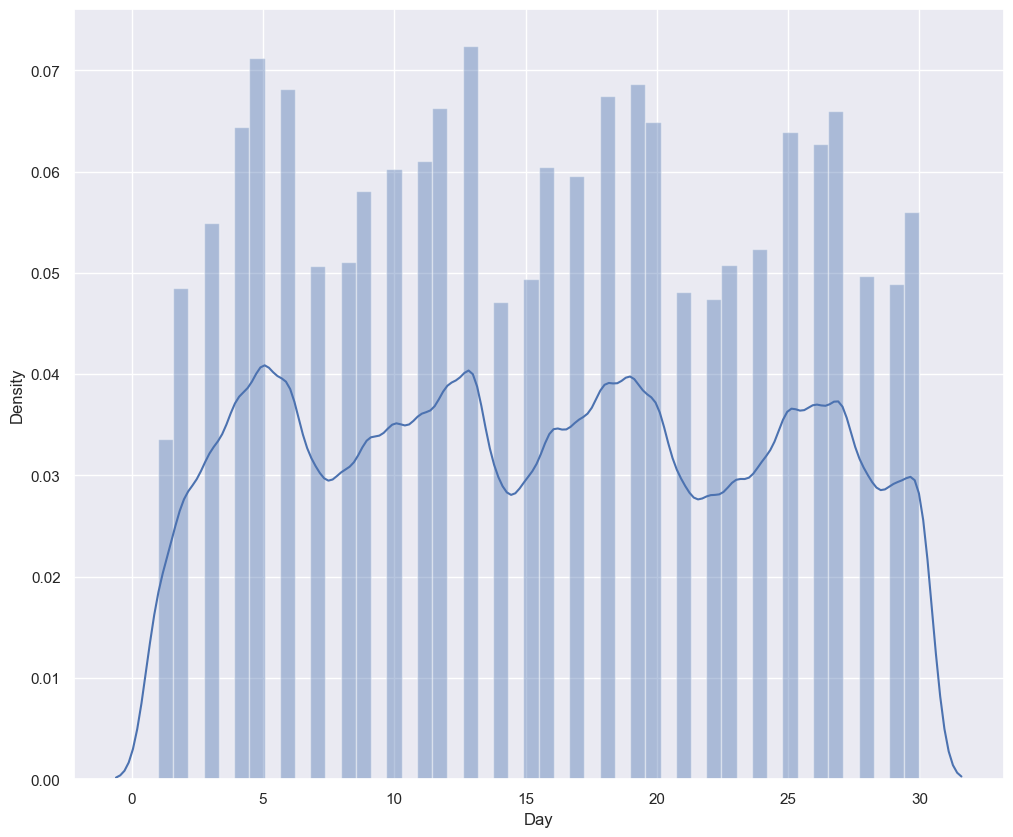

In [28]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let’s analyze the Uber trips according to the hours:



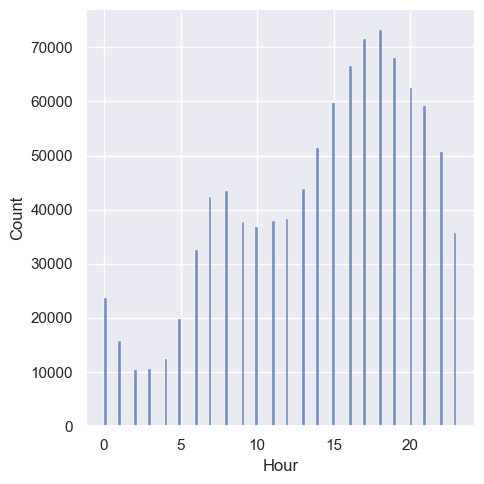

In [12]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.displot(data['Hour'])

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips according to the weekdays:

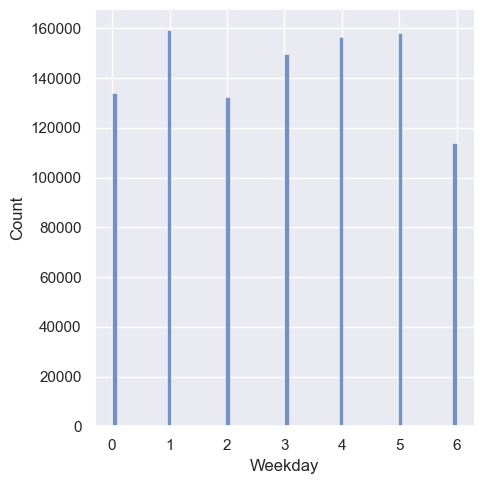

In [14]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.displot(data["x"])

In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. Now let’s have a look at the correlation of hours and weekdays on the Uber trips:

<Axes: xlabel='Hour', ylabel='Weekday'>

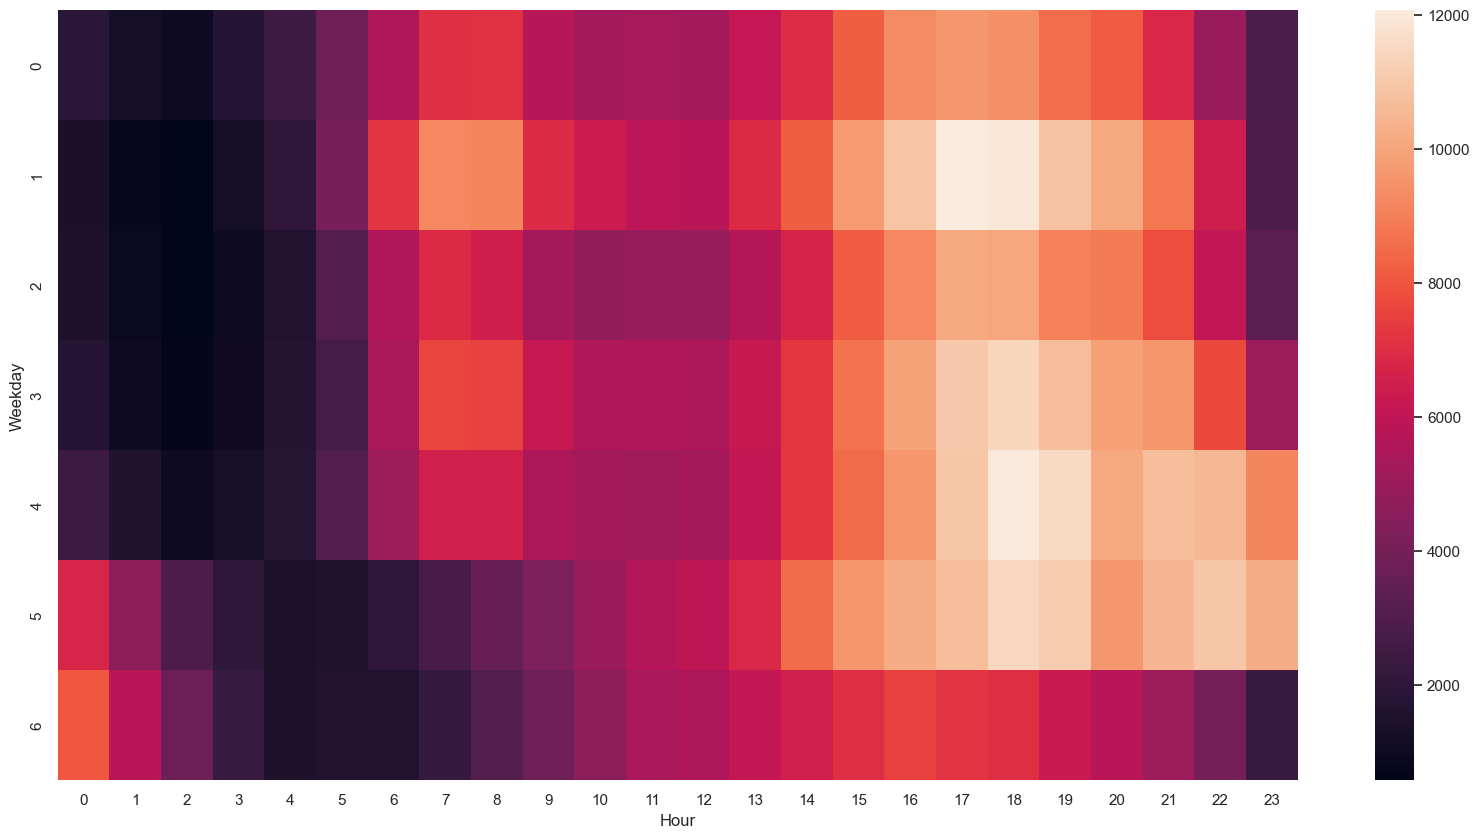

In [19]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday","Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df,annot = False)

As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1256: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


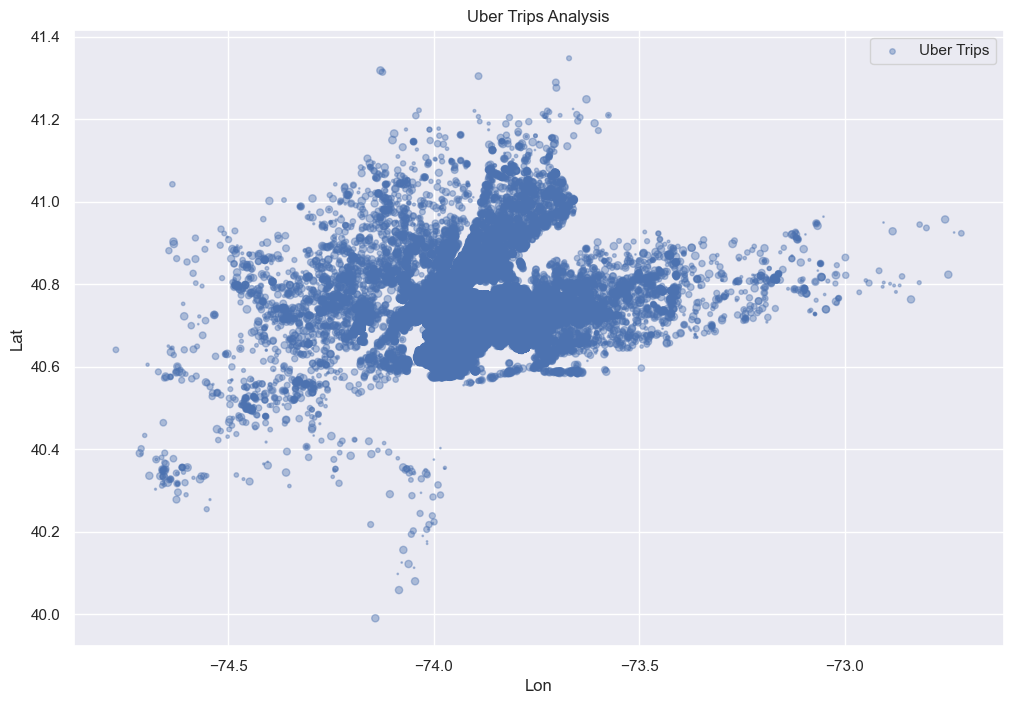

In [31]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

# Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

1.Monday is the most profitable day for Uber

2.On Saturdays less number of people use Uber

3.6 pm is the busiest day for Uber

4.On average a rise in Uber trips start around 5 am.

5.Most of the Uber trips originate near the Manhattan region in New York.